In [3]:
import os, glob, nibabel as nib, subprocess, numpy as np, matplotlib.pyplot as plt, pandas as pd, matplotlib as mpl, nilearn
import matplotlib.cm as cm, seaborn as sns
from nilearn import plotting
import subprocess, numpy as np, nibabel as nib
from sklearn.metrics import pairwise_distances
import sys
sys.path.append("./mapalign./mapalign")
import mapalign
from mapalign import embed
from PIL import Image
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn import metrics
import numpy as np

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [54]:
## create a cerebral cortex mask
# take networksonlylabels.nii from conn and exclude label 8 so that cerebellum is not included, then binarize
subprocess.check_output("fslmaths networksonlylabels.nii -uthr 7.5 -bin networkonlylabels_nocerebellum_bin.nii", shell=True);


In [3]:
## cd to folder containing single-subject r maps from each DN seed
## create a dictionary [x,y] where x is the seed number and y is the subject number

listofseeds = np.arange(53, 219)
listofsubjects = np.arange(1, 21)

dictdata = {}
for seed in listofseeds:
    for subject in listofsubjects:
        if seed < 100 and subject < 10:
            dictdata[seed, subject] = nib.load('/mnt/c/Users/xavie/Dropbox (MIT)/MIT/_ACTIVE_PROJECTS/Sheeba_64ChDN/DN_150seeds/corr_Subject00'+str(subject)+'_Condition001_Source0'+str(seed)+'.nii')
        if seed > 99 and subject < 10:
            dictdata[seed, subject] = nib.load('/mnt/c/Users/xavie/Dropbox (MIT)/MIT/_ACTIVE_PROJECTS/Sheeba_64ChDN/DN_150seeds/corr_Subject00'+str(subject)+'_Condition001_Source'+str(seed)+'.nii')
        if seed < 100 and subject > 9:
            dictdata[seed, subject] = nib.load('/mnt/c/Users/xavie/Dropbox (MIT)/MIT/_ACTIVE_PROJECTS/Sheeba_64ChDN/DN_150seeds/corr_Subject0'+str(subject)+'_Condition001_Source0'+str(seed)+'.nii')
        if seed > 99 and subject > 9:
            dictdata[seed, subject] = nib.load('/mnt/c/Users/xavie/Dropbox (MIT)/MIT/_ACTIVE_PROJECTS/Sheeba_64ChDN/DN_150seeds/corr_Subject0'+str(subject)+'_Condition001_Source'+str(seed)+'.nii')


In [66]:
# these are the 3 dimensions of each nifti file
dictdata[53, 1].shape

(91, 109, 91)

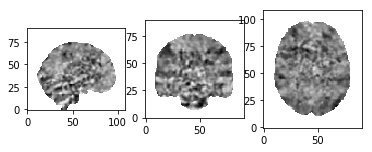

In [67]:
## plot one file as an example

ex = dictdata[53, 1].get_data()

def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

slice_0 = ex[45, :, :]
slice_1 = ex[:, 50, :]
slice_2 = ex[:, :, 45]
show_slices([slice_0, slice_1, slice_2])
plt.show()


In [4]:
# save npy files that are the average across subjects for each seed

listofseeds = np.arange(53, 219) # name of seeds go from 53 to 219
listofsubjects = np.arange(1, 21)

dictforthisseed = {}
for seed in listofseeds:
    for subject in listofsubjects:
        dictforthisseed[subject] = np.ndarray.flatten(dictdata[seed, subject].get_data())
    tableforthisseed = pd.DataFrame.from_dict(dictforthisseed, orient='index')
    median = tableforthisseed.median(axis='index')
    np.save('seed'+str(seed), np.array(median))
    print('Seed '+str(seed)+' done!')

Seed 180 done!
Seed 181 done!
Seed 182 done!
Seed 183 done!
Seed 184 done!
Seed 185 done!
Seed 186 done!
Seed 187 done!
Seed 188 done!
Seed 189 done!
Seed 190 done!
Seed 191 done!
Seed 192 done!
Seed 193 done!
Seed 194 done!
Seed 195 done!
Seed 196 done!
Seed 197 done!
Seed 198 done!
Seed 199 done!
Seed 200 done!
Seed 201 done!
Seed 202 done!
Seed 203 done!
Seed 204 done!
Seed 205 done!
Seed 206 done!
Seed 207 done!
Seed 208 done!
Seed 209 done!
Seed 210 done!
Seed 211 done!
Seed 212 done!
Seed 213 done!
Seed 214 done!
Seed 215 done!
Seed 216 done!
Seed 217 done!
Seed 218 done!


In [4]:
# transform all seed maps into nifti files:
listofseeds = np.arange(53, 219)
for seed in listofseeds:
    ex = np.load('/mnt/c/Users/xavie/Dropbox (MIT)/MIT/_ACTIVE_PROJECTS/Sheeba_64ChDN/DN_150seeds/seed'+str(seed)+'.npy')
    ex.shape = (91, 109, 91)
    template_for_affine = nib.load('/mnt/c/Users/xavie/Dropbox (MIT)/MIT/_ACTIVE_PROJECTS/Sheeba_64ChDN/DN_150seeds/corr_Subject001_Condition001_Source053.nii')
    img = nib.Nifti1Image(ex, template_for_affine.affine)
    img.to_filename('seed'+str(seed)+'.nii.gz')